In [1]:
import time
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
cars = pd.read_csv(r'C:\Users\Alon\Desktop\קורסים\מדעי הנתונים\cars_data_lvl2done.csv', index_col  = 'index')

# Null Check

In [40]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2972 entries, 0 to 3001
Data columns (total 71 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index.1               2972 non-null   int64 
 1   version               2972 non-null   object
 2   year                  2972 non-null   int64 
 3   CompanyName           2972 non-null   object
 4   is_GAC                2972 non-null   int64 
 5   is_maserati           2972 non-null   int64 
 6   is_daihatsu           2972 non-null   int64 
 7   is_porsche            2972 non-null   int64 
 8   is_ds                 2972 non-null   int64 
 9   is_smart              2972 non-null   int64 
 10  is_seres              2972 non-null   int64 
 11  is_cadillac           2972 non-null   int64 
 12  is_דודג'              2972 non-null   int64 
 13  is_infinity           2972 non-null   int64 
 14  is_alfa-romeo         2972 non-null   int64 
 15  is_buick              2972 non-null   

In [39]:
print("nulls for each column:")
print(cars.isnull().sum())

print(f'Total number of nulls: {cars.isnull().sum().sum()}')

nulls for each column:
index.1        0
version        0
year           0
CompanyName    0
is_GAC         0
              ..
large          0
small          0
mini           0
medium         0
price          0
Length: 71, dtype: int64
Total number of nulls: 0


# Meaningful parameters: counting, mean and median

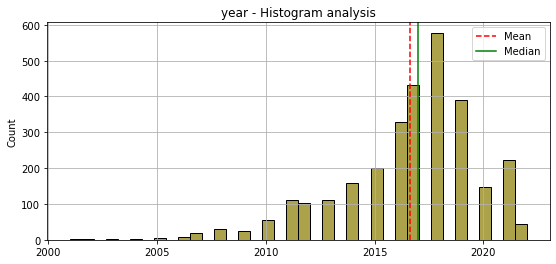

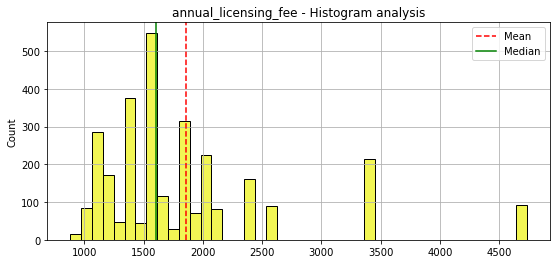

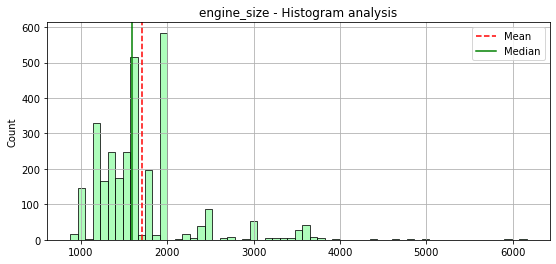

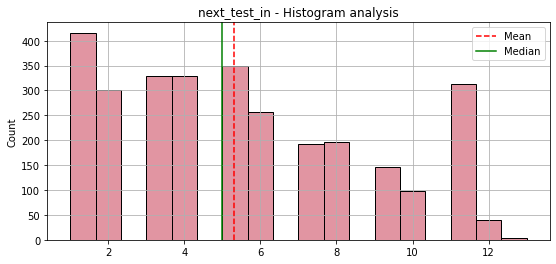

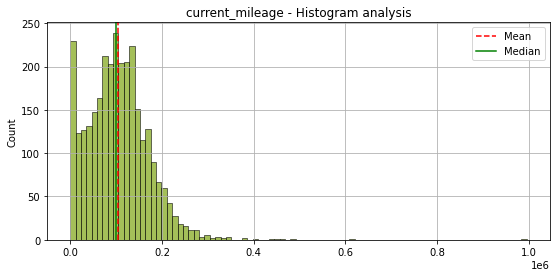

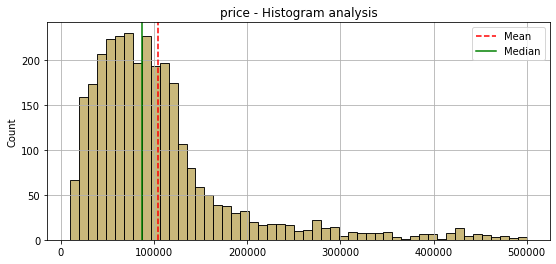

In [6]:
def randomColor():
    r1 = lambda: random.randint(0,255)
    return '#%02X%02X%02X' % (r1(),r1(),r1())

def graphPerCol(df: dict, fields: list):
    for field in fields:
        f, (ax1) = plt.subplots(1, 1, figsize=(9, 4))
        v_dist_1 = df[field].values
        sns.histplot(v_dist_1, ax=ax1, color=randomColor())

        mean=df[field].mean() #ממוצע
        median=df[field].median() #חציון

        ax1.axvline(mean, color='r', linestyle='--', label="Mean")
        ax1.axvline(median, color='g', linestyle='-', label="Median")
        ax1.legend()
        plt.grid()
        plt.title(f"{field} - Histogram analysis")

graphPerCol(cars, cars[["year", "annual_licensing_fee", "engine_size",
                        "next_test_in" , "current_mileage", "price"]].columns)

# Correlation check

### Checking correlation between meaningful parameters

In [10]:
colsToCorr = cars[["year", "annual_licensing_fee", "engine_size", "hand",
                       "next_test_in" , "current_mileage", "car_length", "price"]]

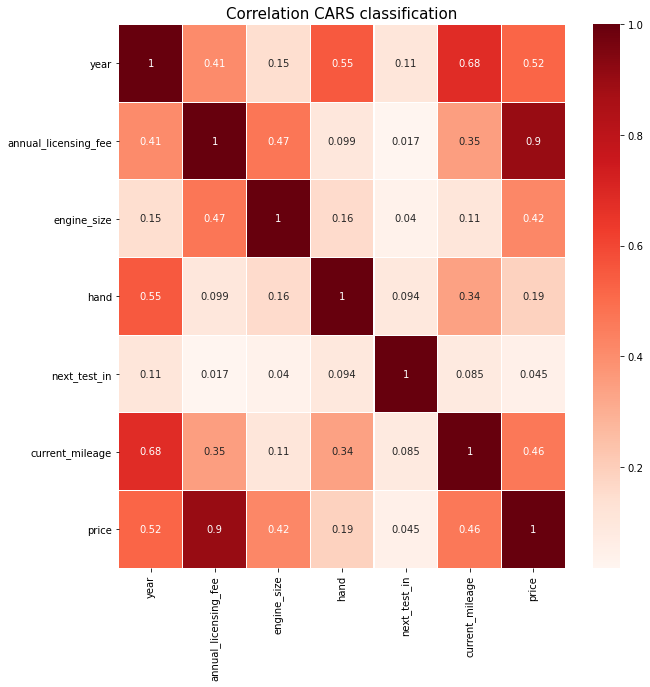

In [43]:
def get_headmap(colsToCorr: dict):
    corr = colsToCorr.corr().abs()
    plt.figure(figsize=(10, 10))
    sns.heatmap(corr, annot=True, cmap="Reds", linewidths=0.1, annot_kws={"fontsize":10})
    plt.title("Correlation CARS classification", size=15)
    
get_headmap(colsToCorr)

### Checking correlation specificly for price

In [18]:
corr_matrix = cars.corr()
corr_matrix["price"].sort_values(ascending = False).abs()

price                   1.000000
annual_licensing_fee    0.900354
year                    0.522056
engine_size             0.420062
is_mercedes             0.388515
                          ...   
small                   0.159597
mini                    0.175787
hand                    0.187873
is_leasing              0.214572
current_mileage         0.464100
Name: price, Length: 64, dtype: float64

#### we can notice that 'annual_licensing_fee' has a great correlation. aftre a check, we found out that it is a derivative of the price. so we decided to drop it down.

### Checking correlation for each company

In [24]:
car_names = cars.CompanyName.unique() #array that contains all the companies
corol_com = np.zeros(len(car_names)) #array that contains all the correlations
car_names_eng = cars.CompanyName.unique() #array that contains all the companies in english (just for visual)
counter = 0

for x in car_names:
    car_names_eng[counter] = itemToEnglish(x)
    tempStr = "is_" + itemToEnglish(x)
    corol_com[counter] = abs(corr_matrix["price"].sort_values(ascending = False)[tempStr])
    counter = counter+1

In [25]:
#Setting for how many graphes we're spliting. We chose 2
NUM_OF_GRAPH = 2
arr = np.arange(0, NUM_OF_GRAPH)

array([0, 1])

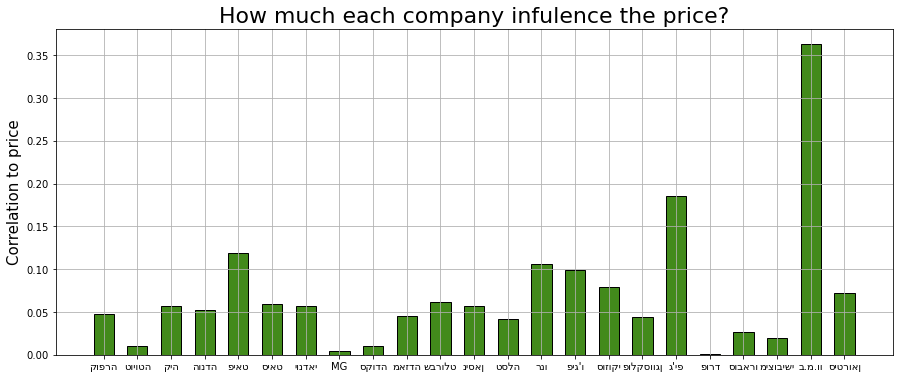

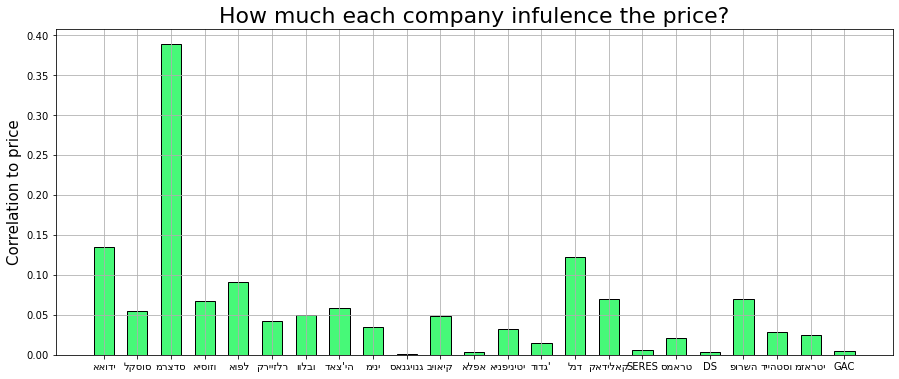

In [28]:
def splitGraph(car_names, corol_com):
    for x in arr:
        
        plt.subplots(1, 1, figsize=(15, 6))
        
        xCol = car_names[int(len(car_names_eng)/2*x):int(len(car_names)/2*(x+1))]
        yCol = corol_com[int(len(car_names_eng)/2*x):int(len(car_names)/2*(x+1))]
        
        plt.bar(xCol, yCol, width=0.6, color = randomColor(), edgecolor = 'black')
        plt.grid()
        
        plt.ylabel('Correlation to price', size = 15)
        plt.title('How much each company infulence the price?', size = 22)

splitGraph(car_names, corol_com)

In [42]:
#a function that convernt company name to english
def itemToEnglish (item):
    if (item == "אלפא"): 
        item = 'alfa-romeo'  
    elif (item =='ניסאן'): 
        item = 'nissan'
    elif (item == "מאזדה"): 
        item = 'mazda'
    elif (item == "סובארו"): 
        item = 'subaru'
    elif (item == "מרצדס"): 
        item = 'mercedes'
    elif (item == "סיאט"): 
        item = 'siat'   
    elif (item == "סיטרואן"): 
        item = 'citroen'   
    elif (item == "טויוטה"): 
        item = 'toyota'   
    elif (item =="ג'יפ"): 
        item = 'jeep'   
    elif (item == "קיה"): 
        item = 'kia'   
    elif (item == "יונדאי"): 
        item = 'hyundai'   
    elif (item == "דייהטסו"): 
        item = 'daihatsu'   
    elif (item == "פורשה"): 
        item = 'porsche'   
    elif (item == "פיאט"): 
        item = 'fiat'   
    elif (item == "פורד"): 
        item = 'ford'   
    elif (item == "סוזוקי"): 
        item = 'suzuki'   
    elif (item == "דאצ'יה"): 
        item = 'dacia'   
    elif (item == "ב.מ.וו"): 
        item = 'bmw'   
    elif (item == "פיג'ו"): 
        item = 'peugeot'   
    elif (item == "מיצובישי"): 
        item = 'mitsubishi'   
    elif (item == "פולקסווגן"): 
        item = 'volkswagen'   
    elif (item == "רנו"): 
        item = 'reno' 
    elif (item == "הונדה"): 
        item = 'honda' 
    elif (item == "אאודי"): 
        item = 'audi' 
    elif (item == "סקודה"): 
        item = 'skoda' 
    elif (item == "מיני"): 
        item = 'mini' 
    elif (item == "אינפיניטי"): 
        item = 'infinity'
    elif (item == "לנד"): 
        item = 'landrover' 
    elif (item == "שברולט"): 
        item = 'chevrolet'
    elif (item == "אופל"): 
        item = 'opel'
    elif (item == "MG"): 
        item = 'MG'
    elif (item == "טסלה"): 
        item = 'tesla'
    elif (item == "'דודג"): 
        item = 'dodge'
    elif (item == "ביואיק"): 
        item = 'buick'
    elif (item == "יגואר"): 
        item = 'jaguar'   
    elif (item == "לקסוס"): 
        item = 'lexus' 
    elif (item == "סמארט"): 
        item = 'smart'
    elif (item == "סאנגיונג"): 
        item = 'sangiang'
    elif (item == "קאדילק"): 
        item = 'cadillac'
    elif (item == "קופרה"): 
        item = 'cupra'   
    elif (item == "קרייזלר"): 
        item = 'chrysler'
    elif (item == "מזארטי"): 
        item = 'maserati' 
    elif (item == "וולבו"): 
        item = 'volvo'
    elif (item == "איסוזו"): 
        item = 'isuzu'
    elif (item == "GMC"): 
        item = 'gmc'
    elif (item == 'DS'):
        item = 'ds'
    elif (item == "קאדילאק"):
        item = 'cadillac'
    elif (item == 'SERES'):
        item = 'seres'
    return item